**here is put all missions together to practice more and more about data analysis**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


happinness2015 = pd.read_csv("World_Happiness_2015.csv")

happinness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [2]:
happinness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<AxesSubplot:title={'center':'Happiness score for all countries'}>

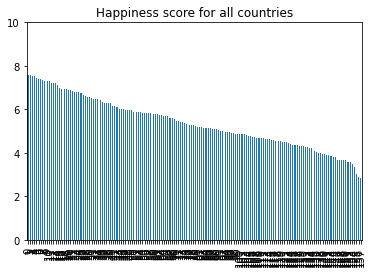

In [3]:
happinness2015["Happiness Score"].plot(kind = "bar" , title = "Happiness score for all countries", ylim = (0,10))

the world groups are: 
['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']

         Country  Happiness Score
78        Bhutan            5.253
80      Pakistan            5.194
108   Bangladesh            4.694
116        India            4.565
120        Nepal            4.514
131    Sri Lanka            4.271
152  Afghanistan            3.575


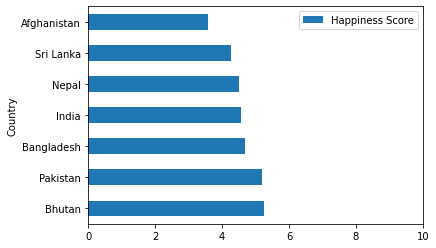

In [4]:
# aggregating data using for loops 
groups  = happinness2015["Region"].unique()

print("the world groups are: \n{}\n".format(groups))

# choose spesific region to plot it 
so_asia = happinness2015[happinness2015["Region"] == "Southern Asia"]
print(so_asia[["Country" , "Happiness Score"]])
so_asia.plot(kind = "barh" , x = "Country" , y = "Happiness Score", xlim = (0,10) )

# plt.barh( so_asia["Country"] ,  so_asia["Happiness Score"])
plt.show()

and then how to aggregate the data using for loops split dataframe --> apply function-->collect in a data structure

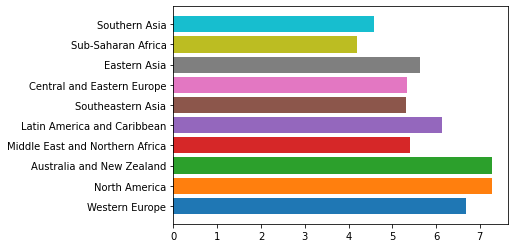

In [5]:
group_region = happinness2015["Region"].unique()
happ_groups_mean = {}

for region in group_region :
    region_countries = happinness2015[happinness2015["Region"] == region]
    happ_means = region_countries["Happiness Score"].mean()
    happ_groups_mean[region] = happ_means
    
# show the output
for k,v in happ_groups_mean.items():
    plt.barh(k , v)

the same process of aggregation can happen with pandas using `df.groupby()` object or operation it will do more than this but the same it splits the dataframe into parts and it has documentation to give you what you want with the aggregation method

In [6]:
# apply groupby method
# select group from the groups 

groups = happinness2015.groupby("Region")
aus_nez = groups.get_group("Australia and New Zealand")
east_europe = groups.get_group("Central and Eastern Europe")


mean_groups = happinness2015.groupby("Region").mean()

happinness2015.groupby("Region")


<AxesSubplot:ylabel='Country'>

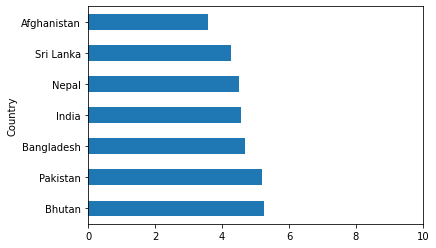

In [7]:
# try the groupby objects groupby.groups , groupby.get_group
grouped = happinness2015.groupby("Region")
# select group 
so_asia = grouped.get_group("Southern Asia")
so_asia.plot(kind = "barh" , x = "Country" , y = "Happiness Score" , xlim = (0,10), legend = False) 

- using `groupby.groups` to show all the groups we have and which rows assighned to each group

In [8]:
grouped = happinness2015.groupby("Region")
groups = grouped.groups
groups

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}

In [9]:
happinness2015[happinness2015["Region"] == "Australia and New Zealand"]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [10]:
# aggregation methods 
grouped = happinness2015.groupby("Region")
max_groups = grouped.max()
max_groups

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,New Zealand,10,7.286,0.04083,1.33358,1.31967,0.93156,0.65124,0.42922,0.47501,2.26646
Central and Eastern Europe,Uzbekistan,134,6.505,0.06913,1.18498,1.34043,0.87337,0.65821,0.38331,0.30030,3.10712
Eastern Asia,Taiwan,100,6.298,0.05051,1.38604,1.30060,1.01328,0.59608,0.37124,0.39478,2.32323
Latin America and Caribbean,Venezuela,119,7.226,0.13693,1.21183,1.30477,0.86027,0.63376,0.24558,0.46187,3.60214
Middle East and Northern Africa,Yemen,156,7.278,0.07832,1.69042,1.22393,0.91387,0.64157,0.52208,0.47179,3.08854
North America,United States,15,7.427,0.03839,1.39451,1.32261,0.90563,0.63297,0.32957,0.45811,2.51011
Southeastern Asia,Vietnam,145,6.798,0.06698,1.52186,1.26504,1.02525,0.66246,0.49210,0.79588,2.31945
Southern Asia,Sri Lanka,153,5.253,0.03751,0.83524,1.10395,0.70806,0.53726,0.15445,0.47998,3.10709
Sub-Saharan Africa,Zimbabwe,158,5.477,0.11068,1.06024,1.18468,0.70950,0.59201,0.55191,0.50318,3.05137


In [11]:
# the size method 
size = happinness2015.groupby("Region").size()
# s = happinness2015["Region"].value_counts()

size

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [12]:
happinness2015.groupby("Region").count()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,2,2,2,2,2,2,2,2,2,2,2
Central and Eastern Europe,29,29,29,29,29,29,29,29,29,29,29
Eastern Asia,6,6,6,6,6,6,6,6,6,6,6
Latin America and Caribbean,22,22,22,22,22,22,22,22,22,22,22
Middle East and Northern Africa,20,20,20,20,20,20,20,20,20,20,20
North America,2,2,2,2,2,2,2,2,2,2,2
Southeastern Asia,9,9,9,9,9,9,9,9,9,9,9
Southern Asia,7,7,7,7,7,7,7,7,7,7,7
Sub-Saharan Africa,40,40,40,40,40,40,40,40,40,40,40


In [13]:
happinness2015.groupby("Region").min()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,Australia,9,7.284,0.03371,1.25018,1.30923,0.90837,0.63938,0.35637,0.43562,2.26425
Central and Eastern Europe,Albania,31,4.218,0.03135,0.39047,0.38562,0.53886,0.09245,0.00227,0.00199,0.89991
Eastern Asia,China,38,4.874,0.02424,0.82819,0.94675,0.60268,0.33208,0.02666,0.08185,0.65429
Latin America and Caribbean,Argentina,12,4.518,0.04076,0.26673,0.74302,0.38847,0.24425,0.01140,0.05841,1.21305
Middle East and Northern Africa,Algeria,11,3.006,0.03260,0.54649,0.47489,0.40064,0.00000,0.04582,0.06431,0.32858
North America,Canada,5,7.119,0.03553,1.32629,1.24711,0.86179,0.54604,0.15890,0.40105,2.45176
Southeastern Asia,Cambodia,24,3.819,0.02596,0.27108,0.62736,0.48246,0.44017,0.00000,0.16860,0.98195
Southern Asia,Afghanistan,79,3.575,0.02043,0.31982,0.30285,0.30335,0.12102,0.05907,0.21222,0.67108
Sub-Saharan Africa,Angola,71,2.839,0.03464,0.00000,0.00000,0.00000,0.10081,0.03060,0.06822,0.67042


doing aggregation for single column
1. we can choose a column like normal dataframes 

In [14]:
# show the max value for the family score in middle east and North Africa
grouped = happinness2015.groupby("Region").max()
grouped.loc["Middle East and Northern Africa" , ["Country" , "Family"]]

Country      Yemen
Family     1.22393
Name: Middle East and Northern Africa, dtype: object

In [15]:
# which country in europe has the least family extent in happiness 

grouped_min = happinness2015.groupby("Region").min()
grouped_min[["Country" , "Family"]]

,Country,Family
Region,,
Australia and New Zealand,Australia,1.30923
Central and Eastern Europe,Albania,0.38562
Eastern Asia,China,0.94675
Latin America and Caribbean,Argentina,0.74302
Middle East and Northern Africa,Algeria,0.47489
North America,Canada,1.24711
Southeastern Asia,Cambodia,0.62736
Southern Asia,Afghanistan,0.30285
Sub-Saharan Africa,Angola,0.00000


In [16]:
happinness2015.groupby("Region")["Family"].min() # the same code 

happinness2015.groupby("Region").min()["Family"]

Region
Australia and New Zealand          1.30923
Central and Eastern Europe         0.38562
Eastern Asia                       0.94675
Latin America and Caribbean        0.74302
Middle East and Northern Africa    0.47489
North America                      1.24711
Southeastern Asia                  0.62736
Southern Asia                      0.30285
Sub-Saharan Africa                 0.00000
Western Europe                     0.89318
Name: Family, dtype: float64

In [17]:
# for happiness score 
grouped = happinness2015.groupby("Region").mean()
grouped["Happiness Score"]

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [18]:
# aggregation for specific columns 
means = happinness2015.groupby("Region").mean()
means[["Happiness Score" , "Family" , "Freedom"]]

,Happiness Score,Family,Freedom
Region,,,
Australia and New Zealand,7.285000,1.314450,0.645310
Central and Eastern Europe,5.332931,1.053042,0.358269
Eastern Asia,5.626167,1.099427,0.462490
Latin America and Caribbean,6.144682,1.104720,0.501740
Middle East and Northern Africa,5.406900,0.920490,0.361751
North America,7.273000,1.284860,0.589505
Southeastern Asia,5.317444,0.940468,0.557104
Southern Asia,4.580857,0.645321,0.373337
Sub-Saharan Africa,4.202800,0.809085,0.365944


- A Question comes again do we have method to do this better ? answer is yes

using `Agg()` method

In [19]:
grouped_regions = happinness2015.groupby("Region")
mean_max_groups = grouped_regions.agg(["max" , "min" , "mean" , "size"])

rank_and_score = mean_max_groups[["Happiness Score" , "Happiness Rank"]]

rank_and_score

happinness2015.groupby('Region').agg(["min" , "max"])



Country                 Happiness Rank  \
                                         min             max            min   
Region                                                                        
Australia and New Zealand          Australia     New Zealand              9   
Central and Eastern Europe           Albania      Uzbekistan             31   
Eastern Asia                           China          Taiwan             38   
Latin America and Caribbean        Argentina       Venezuela             12   
Middle East and Northern Africa      Algeria           Yemen             11   
North America                         Canada   United States              5   
Southeastern Asia                   Cambodia         Vietnam             24   
Southern Asia                    Afghanistan       Sri Lanka             79   
Sub-Saharan Africa                    Angola        Zimbabwe             71   
Western Europe                       Austria  United Kingdom              1   

                                     Happiness Score        Standard Error  \
                                 max             min    max            min   
Region                                                                       
Australia and New Zealand         10           7.284  7.286        0.03371   
Central and Eastern Europe       134           4.218  6.505        0.03135   
Eastern Asia                     100           4.874  6.298        0.02424   
Latin America and Caribbean      119           4.518  7.226        0.04076   
Middle East and Northern Africa  156           3.006  7.278        0.03260   
North America                     15           7.119  7.427        0.03553   
Southeastern Asia                145           3.819  6.798        0.02596   
Southern Asia                    153           3.575  5.253        0.02043   
Sub-Saharan Africa               158           2.839  5.477        0.03464   
Western Europe                   102           4.857  7.587        0.01848   

                                         Economy (GDP per Capita)           \
                                     max                      min      max   
Region                                                                       
Australia and New Zealand        0.04083                  1.25018  1.33358   
Central and Eastern Europe       0.06913                  0.39047  1.18498   
Eastern Asia                     0.05051                  0.82819  1.38604   
Latin America and Caribbean      0.13693                  0.26673  1.21183   
Middle East and Northern Africa  0.07832                  0.54649  1.69042   
North America                    0.03839                  1.32629  1.39451   
Southeastern Asia                0.06698                  0.27108  1.52186   
Southern Asia                    0.03751                  0.31982  0.83524   
Sub-Saharan Africa               0.11068                  0.00000  1.06024   
Western Europe                   0.05635                  1.15406  1.56391   

                                 ... Health (Life Expectancy)           \
                                 ...                      min      max   
Region                           ...                                     
Australia and New Zealand        ...                  0.90837  0.93156   
Central and Eastern Europe       ...                  0.53886  0.87337   
Eastern Asia                     ...                  0.60268  1.01328   
Latin America and Caribbean      ...                  0.38847  0.86027   
Middle East and Northern Africa  ...                  0.40064  0.91387   
North America                    ...                  0.86179  0.90563   
Southeastern Asia                ...                  0.48246  1.02525   
Southern Asia                    ...                  0.30335  0.70806   
Sub-Saharan Africa               ...                  0.00000  0.70950   
Western Europe                   ...                  0.87464  0.95562   

                

In [20]:
# get the happiest and most sad country in africa
min_max = happinness2015.groupby("Region").agg(["min" , "max"])

min_max_african_countries = min_max.loc[["Sub-Saharan Africa" , "Middle East and Northern Africa"], ["Happiness Rank" , "Happiness Score", "Country"]]

happinness2015[happinness2015["Country"] == "Egypt"]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
134,Egypt,Middle East and Northern Africa,135,4.194,0.0326,0.8818,0.747,0.61712,0.17288,0.06324,0.11291,1.59927


In [21]:
happinness2015.groupby("Region").agg(["mean"])

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980008
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769


In [22]:
# create your own function and apply it 
def dif(group):
    return group.max() - group.mean()

grouped = happinness2015.groupby("Region").agg(["min", "max" ,dif])
grouped

Happiness Rank                  \
                                           min  max        dif   
Region                                                           
Australia and New Zealand                    9   10   0.500000   
Central and Eastern Europe                  31  134  55.000000   
Eastern Asia                                38  100  35.500000   
Latin America and Caribbean                 12  119  72.090909   
Middle East and Northern Africa             11  156  78.400000   
North America                                5   15   5.000000   
Southeastern Asia                           24  145  63.777778   
Southern Asia                               79  153  39.857143   
Sub-Saharan Africa                          71  158  30.100000   
Western Europe                               1  102  72.476190   

                                Happiness Score                   \
                                            min    max       dif   
Region                                                             
Australia and New Zealand                 7.284  7.286  0.001000   
Central and Eastern Europe                4.218  6.505  1.172069   
Eastern Asia                              4.874  6.298  0.671833   
Latin America and Caribbean               4.518  7.226  1.081318   
Middle East and Northern Africa           3.006  7.278  1.871100   
North America                             7.119  7.427  0.154000   
Southeastern Asia                         3.819  6.798  1.480556   
Southern Asia                             3.575  5.253  0.672143   
Sub-Saharan Africa                        2.839  5.477  1.274200   
Western Europe                            4.857  7.587  0.897381   

                                Standard Error                     \
                                           min      max       dif   
Region                                                              
Australia and New Zealand              0.03371  0.04083  0.003560   
Central and Eastern Europe             0.03135  0.06913  0.023922   
Eastern Asia                           0.02424  0.05051  0.013285   
Latin America and Caribbean            0.04076  0.13693  0.075803   
Middle East and Northern Africa        0.03260  0.07832  0.031983   
North America                          0.03553  0.03839  0.001430   
Southeastern Asia                      0.02596  0.06698  0.024289   
Southern Asia                          0.02043  0.03751  0.005349   
Sub-Saharan Africa                     0.03464  0.11068  0.055381   
Western Europe                         0.01848  0.05635  0.018725   

                                Economy (GDP per Capita)  ...   Freedom  \
                                                     min  ...       dif   
Region                                                    ...             
Australia and New Zealand                        1.25018  ...  0.005930   
Central and Eastern Europe                       0.39047  ...  0.299941   
Eastern Asia                                     0.82819  ...  0.133590   
Latin America and Caribbean                      0.26673  ...  0.132020   
Middle East and Northern Africa                  0.54649  ...  0.279819   
North America                                    1.32629  ...  0.043465   
Southeastern Asia                                0.27108  ...  0.105356   
Southern Asia                                    0.31982  ...  0.163923   
Sub-Saharan Africa                               0.00000  ...  0.226066   
Western Europe                                   1.15406  ...  0.119804   

                                Trust (Government Corruption)           \
                                                          min      max   
Region                                                                   
Australia and New Zealand                             0.35637  0.42922   
Central and Eastern Europe                            0.00227  0.38331   
Eastern Asia                                

In [23]:
# happiness differece between max and min score
def dif(group):
    return group.max() - group.min()

grouped = happinness2015.groupby("Region").agg(["max" , np.min, dif])
grouped["Happiness Score"]

,max,amin,dif
Region,,,
Australia and New Zealand,7.286,7.284,0.002
Central and Eastern Europe,6.505,4.218,2.287
Eastern Asia,6.298,4.874,1.424
Latin America and Caribbean,7.226,4.518,2.708
Middle East and Northern Africa,7.278,3.006,4.272
North America,7.427,7.119,0.308
Southeastern Asia,6.798,3.819,2.979
Southern Asia,5.253,3.575,1.678
Sub-Saharan Africa,5.477,2.839,2.638


,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


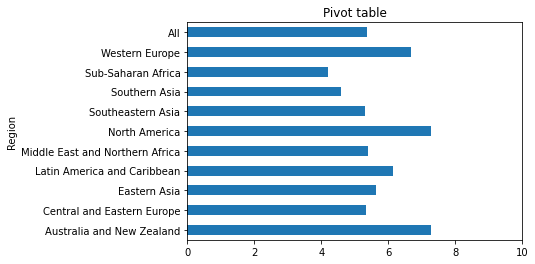

In [24]:
piv_table = happinness2015.pivot_table(index = "Region" , values = ["Happiness Score"] , margins = True)

piv_table.plot(kind = "barh" , title = "Pivot table" , legend = False , xlim = (0,10))

piv_table

**Aggregate with pivot tables**

In [25]:
# try first the groupby to compare it with the results 
happinness2015.groupby("Region")["Happiness Score"].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [26]:
happinness2015.groupby("Region").agg(["mean"])

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980008
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769


In [27]:
# pivot table 
pivot_happ = happinness2015.pivot_table(values = "Happiness Score" , index = "Region", 
                                       aggfunc= "max")
pivot_happ

,Happiness Score
Region,
Australia and New Zealand,7.286
Central and Eastern Europe,6.505
Eastern Asia,6.298
Latin America and Caribbean,7.226
Middle East and Northern Africa,7.278
North America,7.427
Southeastern Asia,6.798
Southern Asia,5.253
Sub-Saharan Africa,5.477


In [28]:
# pivot for the min family score for each region 
happinness2015.pivot_table(index = "Region" , values = ["Family"], aggfunc= ["min" , "mean"] , margins = True)

,min,mean
,Family,Family
Region,,
Australia and New Zealand,1.30923,1.314450
Central and Eastern Europe,0.38562,1.053042
Eastern Asia,0.94675,1.099427
Latin America and Caribbean,0.74302,1.104720
Middle East and Northern Africa,0.47489,0.920490
North America,1.24711,1.284860
Southeastern Asia,0.62736,0.940468
Southern Asia,0.30285,0.645321


In [29]:
# more values (columns)
# the min happy country for each region 
A = happinness2015.pivot_table(index = "Region" , values = ["Happiness Score"] , aggfunc="min")

A

,Happiness Score
Region,
Australia and New Zealand,7.284
Central and Eastern Europe,4.218
Eastern Asia,4.874
Latin America and Caribbean,4.518
Middle East and Northern Africa,3.006
North America,7.119
Southeastern Asia,3.819
Southern Asia,3.575
Sub-Saharan Africa,2.839


In [30]:
# the most corrupted countries all over the planet base on the report in 2015 
corr_score = happinness2015.pivot_table(index = "Region" , values = "Trust (Government Corruption)" , aggfunc = "mean")

corr_score
# it is wrong it does not work this way 


,Trust (Government Corruption)
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


In [31]:
# min corruption for each region 
min_corr = happinness2015.pivot_table(values = ["Trust (Government Corruption)","Happiness Score"] , 
                          index = "Region" , aggfunc= ["min" , "max"])

min_corr

min                                \
                                Happiness Score Trust (Government Corruption)   
Region                                                                          
Australia and New Zealand                 7.284                       0.35637   
Central and Eastern Europe                4.218                       0.00227   
Eastern Asia                              4.874                       0.02666   
Latin America and Caribbean               4.518                       0.01140   
Middle East and Northern Africa           3.006                       0.04582   
North America                             7.119                       0.15890   
Southeastern Asia                         3.819                       0.00000   
Southern Asia                             3.575                       0.05907   
Sub-Saharan Africa                        2.839                       0.03060   
Western Europe                            4.857                       0.01078   

                                            max                                
                                Happiness Score Trust (Government Corruption)  
Region                                                                         
Australia and New Zealand                 7.286                       0.42922  
Central and Eastern Europe                6.505                       0.38331  
Eastern Asia                              6.298                       0.37124  
Latin America and Caribbean               7.226                       0.24558  
Middle East and Northern Africa           7.278                       0.52208  
North America                             7.427                       0.32957  
Southeastern Asia                         6.798                       0.49210  
Southern Asia                             5.253                       0.15445  
Sub-Saharan Africa                        5.477                       0.55191  
Western Europe                            7.587                       0.48357

<AxesSubplot:title={'center':'Happiness core fr all regions'}, ylabel='Region'>

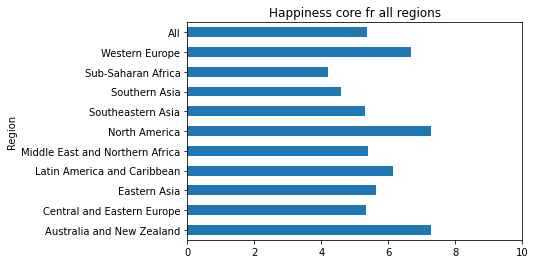

In [32]:
# add margins to get the all part 
mean_happ = happinness2015.pivot_table(index = "Region" , values = "Happiness Score" , aggfunc= "mean",
                          margins= True)

mean_happ.plot(kind = "barh" , xlim = (0,10) , title = "Happiness core fr all regions" , legend = False)

In [33]:
print("the over all mean for happiness {}".format(happinness2015["Happiness Score"].mean()))
print("the mean happiness from pivot table is {}".format(mean_happ.loc["All"]))


the over all mean for happiness 5.3757341772151905
the mean happiness from pivot table is Happiness Score    5.375734
Name: All, dtype: float64


<AxesSubplot:ylabel='Region'>

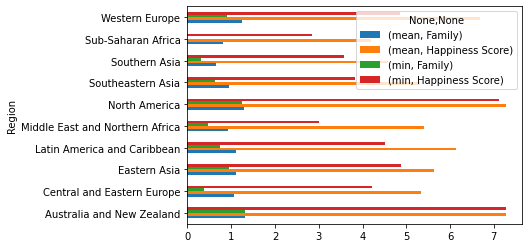

In [34]:
# apply on multiple columns and multiple functions 
happy = happinness2015.pivot_table(values= ["Happiness Score" , "Family"] , index = "Region" , 
                          aggfunc= ["mean", "min"])

happy.plot(kind = "barh" , legend = True)

In [35]:
# aggregation function 
# what is the min and max score with for 3 columns
grouped = happinness2015.groupby("Region").agg(["min" , "max"])
grouped[["Freedom" , "Family"]]

def diff(column):
    return column.max() - column.min()

happinness2015.groupby("Region").agg(["max"])["Happiness Score"]

,max
Region,
Australia and New Zealand,7.286
Central and Eastern Europe,6.505
Eastern Asia,6.298
Latin America and Caribbean,7.226
Middle East and Northern Africa,7.278
North America,7.427
Southeastern Asia,6.798
Southern Asia,5.253
Sub-Saharan Africa,5.477


<AxesSubplot:ylabel='Region'>

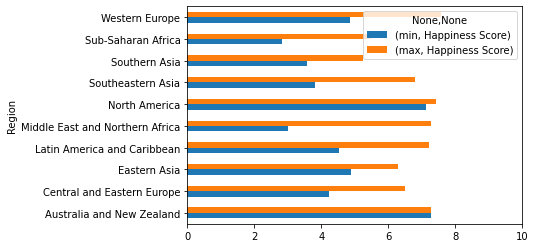

In [36]:
# min and max happiness plot for each region 
piv_table = happinness2015.pivot_table(index = "Region" , values = "Happiness Score" , aggfunc = ["min" , "max"])

piv_table.plot(kind = "barh" , xlim = (0,10))

<AxesSubplot:ylabel='Region'>

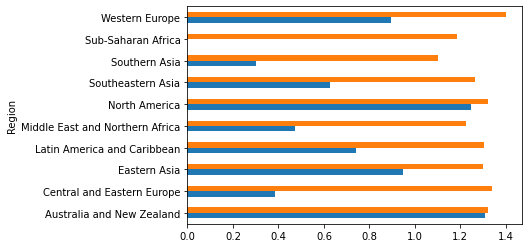

In [37]:
# pivot tables 
A = happinness2015.pivot_table(index = "Region" , values = ["Family"] , aggfunc= ["min" , "max"])

A.plot(kind = "barh" , legend = False)

<AxesSubplot:ylabel='Region'>

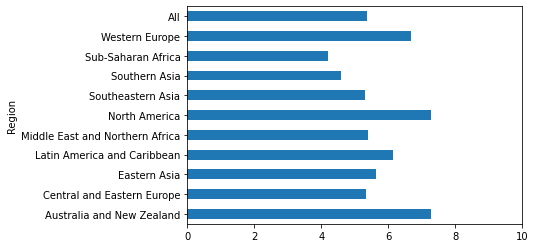

In [38]:
pv_happiness = happinness2015.pivot_table(values = "Happiness Score" , index = "Region" , margins= True)

pv_happiness.plot(kind = "barh" , legend = False, xlim = (0,10))

In [39]:
happinness2015["Happiness Score"].mean()

5.3757341772151905

## combining data with pandas for analysis 

In [40]:
# reading daya again 
# read the datasets
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

# adding new column for each dataset to distiguish between them 
happiness2015["Year"] = 2015
happiness2016["Year"] = 2016
happiness2017["Year"] = 2017



In [45]:
# using concatenation 

head_2015 = happiness2015[["Country" , "Happiness Score" , "Year"]].head(4)
head_2016 = happiness2016[["Country" , "Happiness Score" , "Year"]].head(3)

pd.concat([head_2015 , head_2016] , axis = 0, ignore_index = True)

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
3,Norway,7.522,2015
4,Denmark,7.526,2016
5,Switzerland,7.509,2016
6,Iceland,7.501,2016


In [144]:
# concatenating with different shapes 
head_2015 = happiness2015[["Country" , "Happiness Score" , "Year" , "Family"]].head(4)
head_2016 = happiness2016[["Country" , "Happiness Score" , "Year"]].head(3)

pd.concat([head_2015 , head_2016] , axis = 1)

,Country,Happiness Score,Year,Family,Country,Happiness Score,Year
0,Switzerland,7.587,2015,1.34951,Denmark,7.526,2016.0
1,Iceland,7.561,2015,1.40223,Switzerland,7.509,2016.0
2,Denmark,7.527,2015,1.36058,Iceland,7.501,2016.0
3,Norway,7.522,2015,1.33095,NaN,NaN,NaN


In [42]:
# focus on index 
A = pd.concat([head_2015, head_2016] , ignore_index= True)
A

,Country,Happiness Score,Year,Family
0,Switzerland,7.587,2015,1.34951
1,Iceland,7.561,2015,1.40223
2,Denmark,7.527,2015,1.36058
3,Norway,7.522,2015,1.33095
4,Denmark,7.526,2016,NaN
5,Switzerland,7.509,2016,NaN
6,Iceland,7.501,2016,NaN


In [46]:
pd.concat([happiness2015, happiness2016, happiness2017]) #more than 2 dataframes

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.349510,0.94143,0.665570,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.402230,0.94784,0.628770,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.360580,0.87464,0.649380,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.330950,0.88521,0.669730,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.322610,0.90563,0.632970,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,NaN,NaN,NaN,NaN,NaN,0.945707,NaN,0.581844,NaN,...,NaN,NaN,151.0,3.471,3.543030,3.398970,0.368746,0.326425,0.455220,0.540061
151,Syria,NaN,NaN,NaN,NaN,NaN,0.396103,NaN,0.081539,NaN,...,NaN,NaN,152.0,3.462,3.663669,3.260331,0.777153,0.500533,0.151347,1.061574
152,Tanzania,NaN,NaN,NaN,NaN,NaN,1.041990,NaN,0.390018,NaN,...,NaN,NaN,153.0,3.349,3.461430,3.236570,0.511136,0.364509,0.066035,0.621130
153,Burundi,NaN,NaN,NaN,NaN,NaN,0.629794,NaN,0.059901,NaN,...,NaN,NaN,154.0,2.905,3.074690,2.735310,0.091623,0.151611,0.084148,1.683024


In [49]:
# using merge to hoin the dataframes 
# understanding the merge function 

h_2015 = happiness2015[["Country" , "Happiness Rank" , "Year"]].iloc[2:5]
h_2016 = happiness2016[["Country" , "Happiness Rank" , "Year"]].iloc[2:5]

h_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015


In [50]:
h_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [56]:
# play 
pd.merge(left = h_2015, right = h_2016 , on = "Country")

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


In [58]:
head_2015 = happiness2015[["Country" , "Happiness Rank" , "Year"]].head(10)
head_2016 = happiness2016[["Country" , "Happiness Rank" , "Year"]].head(7)



In [63]:
# concatenating 2 dataframes 

pd.concat([head_2015 , head_2016]  ,axis = 1)

,Country,Happiness Rank,Year,Country,Happiness Rank,Year
0,Switzerland,1,2015,Denmark,1.0,2016.0
1,Iceland,2,2015,Switzerland,2.0,2016.0
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,Canada,6.0,2016.0
6,Netherlands,7,2015,Netherlands,7.0,2016.0
7,Sweden,8,2015,NaN,NaN,NaN
8,New Zealand,9,2015,NaN,NaN,NaN
9,Australia,10,2015,NaN,NaN,NaN


In [65]:
# how to merge 2 dataframes based on common key 
pd.merge(head_2015, head_2016, on = "Country" , how = "outer" , suffixes= ("_2015" , "_2016"))

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Switzerland,1,2015,2.0,2016.0
1,Iceland,2,2015,3.0,2016.0
2,Denmark,3,2015,1.0,2016.0
3,Norway,4,2015,4.0,2016.0
4,Canada,5,2015,6.0,2016.0
5,Finland,6,2015,5.0,2016.0
6,Netherlands,7,2015,7.0,2016.0
7,Sweden,8,2015,NaN,NaN
8,New Zealand,9,2015,NaN,NaN
9,Australia,10,2015,NaN,NaN


In [88]:
# how many countries have the same happiness rank in 2015, 2016
same_rank_countries = pd.merge(happiness2015, happiness2016, on = ["Happiness Score" , "Country"] , how = "inner", 
                              suffixes= ("_2015" , "_2016"))

same_rank_countries[["Country" , "Year_2015" , "Year_2016"]]

,Country,Year_2015,Year_2016
0,Suriname,2015,2016
1,Trinidad and Tobago,2015,2016
2,Laos,2015,2016
3,Comoros,2015,2016
4,Burundi,2015,2016


In [128]:
pd.merge(h_2015, h_2016, right_index=True, left_index= True)

,Country_x,Happiness Rank_x,Year_x,Country_y,Happiness Rank_y,Year_y
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [130]:
data_2015 = happiness2015[["Country" , "Happiness Rank" , "Year"]].iloc[50:57]
data_2016 = happiness2016[["Country" , "Happiness Rank" , "Year"]].iloc[50:61]




In [132]:
pd.merge(data_2015, data_2016, left_index=False, right_index=False)


,Country,Happiness Rank,Year


In [142]:
pd.merge(data_2015, data_2016, how = "inner" , on = "Happiness Rank", suffixes=("_2015" , "_2016"))

,Country_2015,Happiness Rank,Year_2015,Country_2016,Year_2016
0,Bolivia,51,2015,Ecuador,2016
1,Moldova,52,2015,Belize,2016
2,Paraguay,53,2015,Japan,2016
3,Kazakhstan,54,2015,Kazakhstan,2016
4,Slovenia,55,2015,Moldova,2016
5,Lithuania,56,2015,Russia,2016
6,Nicaragua,57,2015,Poland,2016
7,Nicaragua,57,2015,South Korea,2016


notice here the last country `Nicaragua` has 2 rows with 2 different countries in 2016 that means that **Poland and South Korea** have the same happiness rank `57` in 2016 

In [146]:
# checkining
happiness2016[happiness2016["Happiness Rank"] == 57]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
56,Poland,Central and Eastern Europe,57,5.835,5.749,5.921,1.24585,1.04685,0.69058,0.45190,0.05500,0.14443,2.20035,2016
57,South Korea,Eastern Asia,57,5.835,5.747,5.923,1.35948,0.72194,0.88645,0.25168,0.07716,0.18824,2.35015,2016


In [152]:
# read 2017 dataset 
happiness_2017 = pd.read_csv("World_Happiness_2017.csv")

# rename Happiness score and happiness rank 
happiness_2017.rename({"Happiness.Rank" : "Happiness Rank" , 
                       "Happiness.Score" : "Happiness Score"} , inplace = True , axis = 1)




In [153]:
# merge or concatenate all the data 
happiness_2017["Year"] = 2017

data_combined = pd.concat([happiness2015, happiness2016, happiness_2017], ignore_index = True)
data_combined.head()

# grouping data based on year column 

grouped = data_combined.groupby("Year")

mean_happiness_records = grouped[["Happiness Score"]].mean()

mean_happiness_records

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


<AxesSubplot:ylabel='Year'>

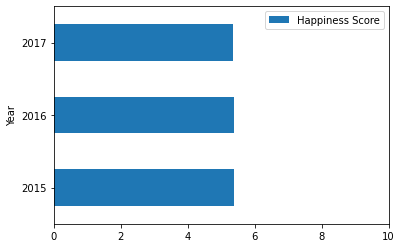

In [162]:
combined = pd.concat([happiness2015, happiness2016, happiness_2017] , ignore_index=True)
# aggregate the data by the year column 
A = combined.pivot_table(index = "Year" , values = "Happiness Score", aggfunc = "mean")

A.plot(kind = "barh" , xlim = (0,10))

<AxesSubplot:ylabel='Year'>

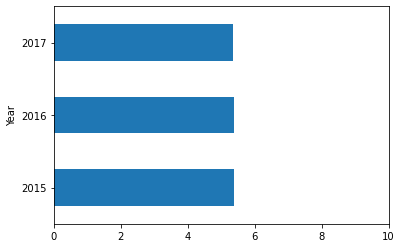

In [56]:
world_happiness = data_combined.pivot_table(values = "Happiness Score" , index = "Year" , aggfunc = "mean")

world_happiness.plot(kind = "barh" , xlim = (0,10) , legend = False)

the orld happiness remain the same for the years 2015 , 2016 , 2017 the average score is 5.3

## transforming data 

In [57]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [58]:
# renaming columns 
mapping = {"Economy (GDP per Capita)" : "Economy",
          "Health (Life Expectancy)" : "Health" , 
          "Trust (Government Corruption)" : "Trust"}

happiness2015.rename(mapping, axis = 1, inplace = True)
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [59]:
factors = ['Country',  'Happiness Score',
        'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity' , "Dystopia Residual"]

happiness2015 = happiness2015[factors]
happiness2015.head()

,Country,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [60]:
# which column contributes the most for the happiness score 

def label(label):
    if label > 1:
        return "High"
    else : 
        return "Low"
    
happiness2015["Family"].map(label)

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Family, Length: 158, dtype: object

In [61]:
def label(label , x):
    if label > x:
        return "High"
    else:
        return "Low"
    
economy_impact = happiness2015["Economy"].apply(label , x = 1)
family_impact = happiness2015["Family"].apply(label , x = 0.9)
freedom_impact = happiness2015["Freedom"].apply(label, x = 1)



In [62]:
def label(col):
    if col > 1:
        return "High"
    else:
        return "Low"
    
eco_family = happiness2015[["Economy" , "Family"]].applymap(label)

eco_family.apply(pd.value_counts)

,Economy,Family
High,66,89
Low,92,69


In [79]:
Impact_factors = happiness2015[factors].iloc[:, 2:]

def percentage(col):
    p = col / happiness2015["Happiness Score"]
    
    return p


Impact_factors = Impact_factors.applymap(label)
Impact_factors = Impact_factors.apply(pd.value_counts)

# Impact_factors = Impact_factors.apply(percentage)

Impact_factors.apply(percentage)

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
High,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### melting dataframes

In [82]:
per = happiness2015[factors].iloc[:, 2:]

per = per.apply(percentage)

In [84]:
per.head()

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,0.184066,0.177871,0.124085,0.087725,0.055329,0.039117,0.331802
1,0.172242,0.185456,0.125359,0.083160,0.018708,0.057704,0.357361
2,0.176097,0.180760,0.116200,0.086273,0.064245,0.045355,0.331080
3,0.193964,0.176941,0.117683,0.089036,0.048528,0.046130,0.327747
4,0.178577,0.178081,0.121938,0.085226,0.044375,0.061682,0.330114


In [88]:
happy_5 = per.head()
happy_5["Country"] = happiness2015["Country"]
# melting the dataframe and put all columns in one 

melt = pd.melt(happy_5 , id_vars= "Country" , value_vars= ["Economy" , "Freedom" , "Family"])

<ipython-input-88-6e2519715e66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_5["Country"] = happiness2015["Country"]


C:\Users\eslam\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1600: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='value'>

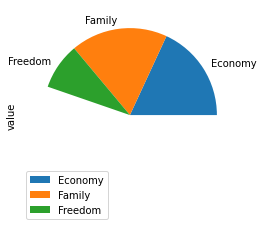

In [97]:
melt

piv_melt = melt.pivot_table(values = "value" , index = "variable" , aggfunc= "mean" )

piv_melt.plot(kind = "pie" , y = "value")

<AxesSubplot:ylabel='Percentage'>

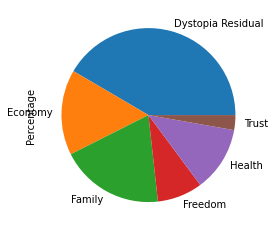

In [111]:
main_cols = ["Country" , "Happiness Score"]

factors = ["Economy" , "Freedom" , "Trust" , "Family" , "Health" , "Dystopia Residual"]


# reshape the happiness2015 report 

melt = pd.melt(happiness2015 , id_vars= main_cols, value_vars = factors)

melt["Percentage"] = round(melt["value"] / melt["Happiness Score"] * 100 , 2) 

grouped  = melt.groupby("variable").mean()

grouped.plot(kind = "pie" , y = "Percentage" , legend = False)

<AxesSubplot:ylabel='Percentage'>

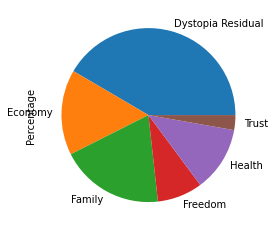

In [125]:
piv_melt = melt.pivot_table(index = "variable" , values = "Percentage")

piv_melt.plot(kind = "pie" , y = "Percentage" , legend = False)